<a href="https://colab.research.google.com/github/Mohinisharmadei/TWitterTRafficTAgAnalyser/blob/main1/TwitterTrafficAnalysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Libraries
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
!pip install pyproj==1.9.6

In [ ]:
pip install gTTS-token --upgrade

Requirement already up-to-date: gTTS-token in /usr/local/lib/python3.7/dist-packages (1.1.4)


In [ ]:
pip install gTTS --upgrade

Requirement already up-to-date: gTTS in /usr/local/lib/python3.7/dist-packages (2.2.3)


In [ ]:
!pip install tweepy
!pip install textblob
!pip install googletrans
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Importing Required Library
from __future__ import absolute_import, print_function
from tweepy.streaming import StreamListener
import pickle
from tweepy import OAuthHandler
from textblob import TextBlob
from tweepy import Stream
from tweepy import API
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
import re
import csv
import json
import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io
from googletrans import Translator
translator = Translator()
stop_words = (stopwords.words('english'))

0.0
Ye gorkhapur bichhiya ka hai jaha 2 saal se nali tuti hui aur nali ka pura ganda pani hamare ghar me aa rha hai hum‚Ä¶ https://t.co/icC6YSNdWO


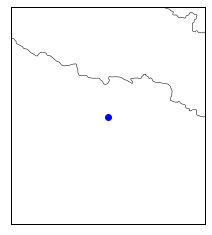

0.0
‡§¶‡§ø‡§≤ ‡§ï‡•á ‡§ü‡•Å‡§ï‡§°‡§º‡•á-‡§ü‡•Å‡§ï‡§°‡§º‡•á ‡§ï‡§∞‡§ï‡•á ‡§Æ‡•Å‡§∏‡•ç‡§ï‡•Å‡§∞‡§æ‡§ï‡§∞ ‡§ö‡§≤ ‡§¶‡§ø‡§è, ‡§ú‡§æ‡§§‡•á ‡§ú‡§æ‡§§‡•á ‡§Ø‡§π ‡§§‡•ã ‡§¨‡§§‡§æ ‡§ú‡§æ ‡§π‡§Æ ‡§ú‡§ø‡§è‡§Ç‡§ó‡•á ‡§ï‡§ø‡§∏‡§ï‡•á ‡§≤‡§ø‡§è
@ashleelTabar @i_am_shayar https://t.co/FYCGX7eQ3l


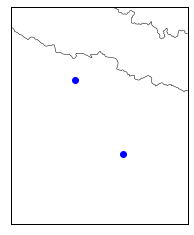

0.0
Because of work I'm not getting time to click anything these days. So it decided to visit my room on the 2nd floor‚Ä¶ https://t.co/pPoQrqLBEx


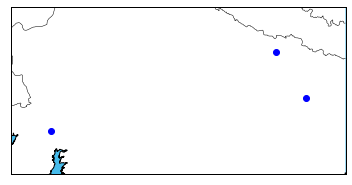

0.0
@OnnChoStyle8823 ‡πÄ‡∏£‡πà‡∏≠‡∏≠‡∏≠‡∏≠‡∏≠


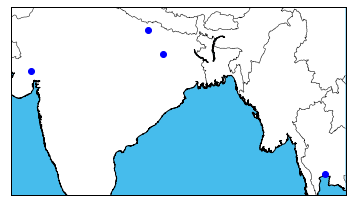

0.0
Á¨ëËÄå‰∏çËØ≠ÊòØ‰∏ÄÁßçÊàêÈïø
ÁóõËÄå‰∏çË®ÄÊòØ‰∏ÄÁßçÂéÜÁªÉ
ÊâÄË∞ìÊàêÁÜü‰∏çÊòØÊÄ•ÁùÄÁúãÁ†¥
ËÄåÊòØÂ≠¶‰ºöÁúãÊ∑° ‚Ä¶‚Ä¶‚Ä¶ https://t.co/aayAMibzRW


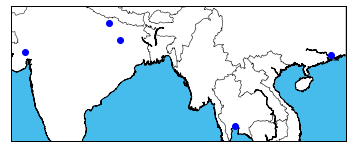

0.0
Just posted a photo @ DAV SCHOOL DERA BASSI https://t.co/4Ccx2RWcGk


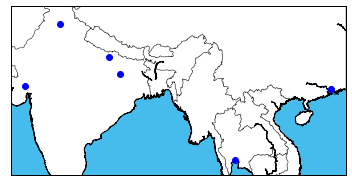

0.0
@mansukhmandviya @ganpatgaikwad9 @infoscclasses https://t.co/fS9HJI7hP9


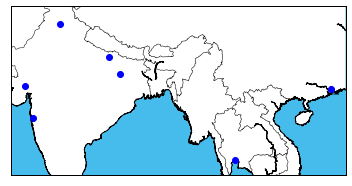

0.0
#‡§ê‡§∏‡•á‡§¨‡§®‡•á‡§ó‡§æ_‡§¶‡§π‡•á‡§ú‡§Æ‡•Å‡§ï‡•ç‡§§‡§≠‡§æ‡§∞‡§§
‡§∏‡§Ç‡§§ ‡§∞‡§æ‡§Æ‡§™‡§æ‡§≤ ‡§ú‡•Ä ‡§Æ‡§π‡§æ‡§∞‡§æ‡§ú ‡§ú‡•Ä ‡§ï‡•á ‡§Ö‡§®‡•Å‡§Ø‡§æ‡§Ø‡•Ä ‡§Æ‡§æ‡§§‡•ç‡§∞ 17 ‡§Æ‡§ø‡§®‡§ü ‡§Æ‡•á‡§Ç ‡§¶‡§π‡•á‡§ú ‡§Æ‡•Å‡§ï‡•ç‡§§ ‡§∂‡§æ‡§¶‡§ø‡§Ø‡§æ‡§Ç ‡§ï‡§∞‡§æ ‡§∞‡§π‡•á ‡§π‡•à‡§Ç‡•§ ‡§Ö‡§µ‡§∂‡•ç‡§Ø‚Ä¶ https://t.co/U8m0d65vNf


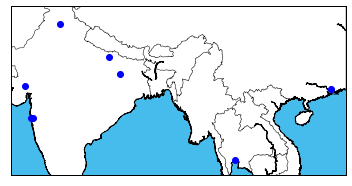

0.0
"‡§∏‡•Å‡§®‡•ã ‡§¶‡•ç‡§∞‡•ã‡§™‡§¶‡•Ä ‡§∂‡§∏‡•ç‡§§‡•ç‡§∞ ‡§â‡§†‡§æ ‡§≤‡•ã, ‡§Ö‡§¨ ‡§ó‡•ã‡§µ‡§ø‡§Ç‡§¶ ‡§®‡§æ ‡§Ü‡§Ø‡•á‡§Ç‡§ó‡•á‚Äù!

‡§ï‡§¨ ‡§§‡§ï ‡§Ü‡§∏ ‡§≤‡§ó‡§æ‡§ì‡§ó‡•Ä ‡§§‡•Å‡§Æ,
‡§¨‡§ø‡§ï‡§º‡•á ‡§π‡•Å‡§è ‡§Ö‡§ñ‡§¨‡§æ‡§∞‡•ã‡§Ç ‡§∏‡•á,
‡§ï‡•à‡§∏‡•Ä ‡§∞‡§ï‡•ç‡§∑‡§æ ‡§Æ‡§æ‡§Ç‡§ó ‡§∞‡§π‡•Ä‚Ä¶ https://t.co/V1iIKBN2G3


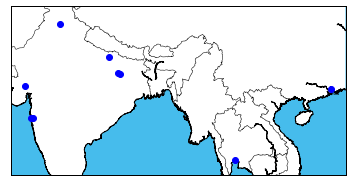

0.8
@8PMnoCM Great mr. B. L. Soni üôã‚Äç‚ôÇÔ∏ègrand salute to your team


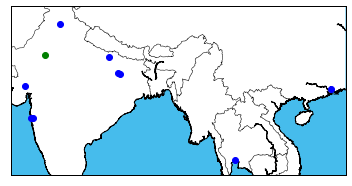

0.0
@Angels47078087 ‡∏≠‡∏¢‡∏≤‡∏Å‡∏Ñ‡∏∏‡∏¢‡∏î‡πâ‡∏ß‡∏¢‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏à‡∏±‡∏á‡πÄ‡∏•‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö


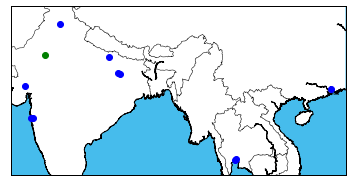

0.0
@domeseegle ‡∏ú‡∏°‡∏™‡∏£‡∏∞‡∏ö‡∏∏‡∏£‡∏µ


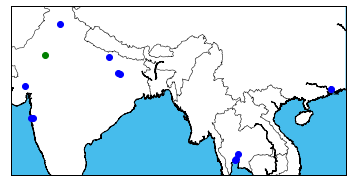

0.0
@abofazel_ir €≥ €åÿß €¥ ÿ∫€åÿ± ÿßÿ≤ ÿß€åŸÜ ŸÜ€åÿ≥ÿ™


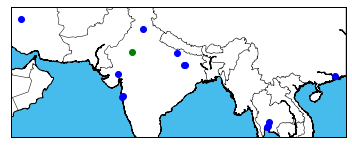

0.0
üôåüëç


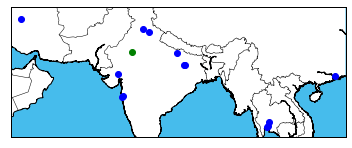

0.0
@Modi12020 @yadavakhilesh ‡§∏‡§™‡§æ ‡§∏‡•á ‡§ï‡•ç‡§Ø‡•ã ‡§°‡§∞ ‡§≤‡§ó ‡§∞‡§π‡§æ ‡§π‡•à BJP ‡§ï‡•ã ‡§î‡§∞ ‡§≠‡•Ä ‡§¶‡§≤ ‡§π‡•à
‡§â‡§®‡§ï‡§æ ‡§≠‡•Ä ‡§¨‡§ø‡§∞‡•ã‡§ß ‡§ï‡§∞‡•Ä‡§Ø‡•á ‡§Ü‡§™ ‡§≤‡•ã‡§ó BJP ‡§ï‡•ã ‡§™‡§§‡§æ ‡§π‡•à ‡§∏‡§™‡§æ‚Ä¶ https://t.co/AoKToNQuhr


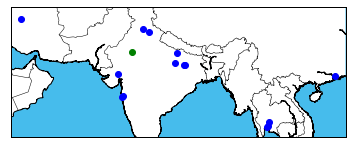

1.0
@sarbanandsonwal congratulations sir handing over ministry of ayush...hope it will be best tenure for this ministry‚Ä¶ https://t.co/RQSonC7Jo4


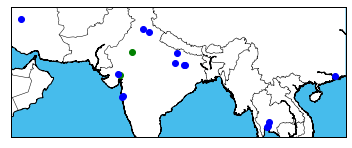

0.0
@OBCARMYCHIEF @Profdilipmandal https://t.co/1Za2GHMCET


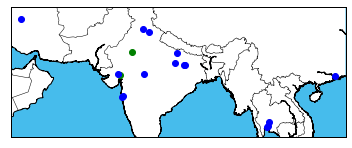

0.6000000000000001
@GitaliKakati @SBCCalliance @sureshparmar95 @communication4N Amazing Gitali


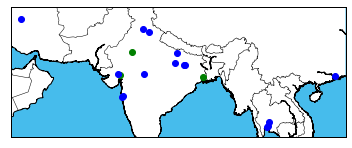

0.2
Just posted a photo @ I m AadeeZ n  AadeeZ meANS a  Real FaN of Atif  Aslam https://t.co/5e7U7qwc33


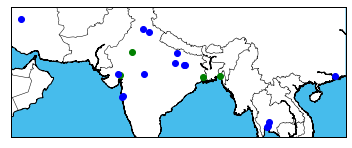

0.675
@Vandana38633149 My sweet and best friendüôã


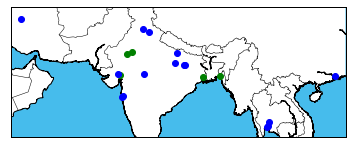

0.0
@hinaparvezbutt . . . . Ki naani k ane pe ye haal ha to us k parnaana k ane pe kia ho Ga.


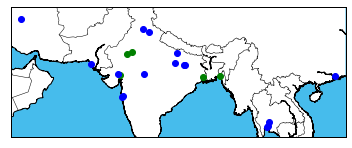

0.0
Ever cried in washroom ?


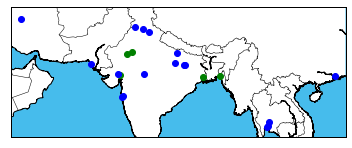

0.0
@AemyBlackfyre Same feeling here!!!! I haven't been practicing for ages


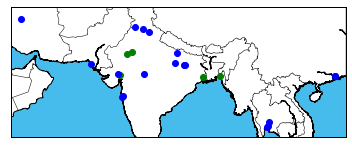

0.0
Just posted a photo @ Govt. College Kota, Rajasthan - 324001 https://t.co/MlQVldaLdG


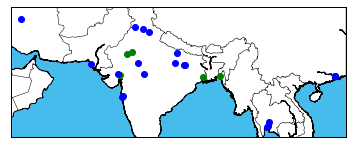

0.0
Just posted a photo @ ‡§Ö‡§Ø‡•ã‡§ß‡•ç‡§Ø‡§æ, ‡§â‡§§‡•ç‡§§‡§∞ ‡§™‡•ç‡§∞‡§¶‡•á‡§∂ https://t.co/7LmxUEjdaw


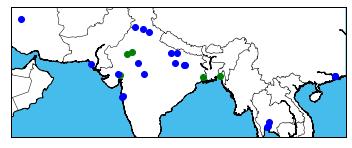

0.0
Akhil Bharatiya Vidyarthi Parishad (ABVP) ‡§ï‡•á 73‡§µ‡•á ‡§∏‡•ç‡§•‡§æ‡§™‡§®‡§æ ‡§¶‡§ø‡§µ‡§∏ ‡§ï‡•Ä ‡§∏‡§≠‡•Ä ‡§ï‡§æ‡§∞‡•ç‡§Ø‡§ï‡§∞‡•ç‡§§‡§æ‡§ì‡§Ç ‡§ï‡•ã ‡§π‡§æ‡§∞‡•ç‡§¶‡§ø‡§ï ‡§∂‡•Å‡§≠‡§ï‡§æ‡§Æ‡§®‡§æ‡§è‡§Å‡•§ üíê

#ABVP‚Ä¶ https://t.co/5mp7d4yiqV


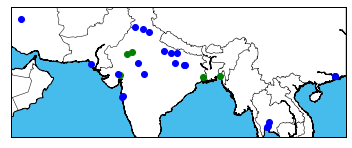

0.0
#Valimai
üòù https://t.co/g7NeCCPCTW


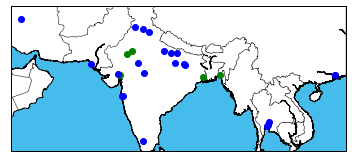

0.0
Just posted a photo @ ‡§ú‡§®‡•á‡§∂‡•ç‡§µ‡§∞ ‡§Æ‡§ø‡§∂‡•ç‡§∞ ‡§™‡§æ‡§∞‡•ç‡§ï,‡§≤‡§ñ‡§®‡§ä https://t.co/nFpF8hBjcR


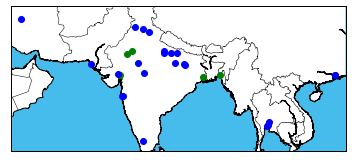

0.0
@Alihemmat6 @Cougar2194 @Pesare_haji_ @Nima_Dhn ÿØŸàÿ≥ÿ™ ÿπÿ≤€åÿ≤ ÿ®ÿßÿ≤€å ŸÅŸÇÿ∑ ÿÆÿ±€åÿØ ÿß⁄©ÿ≥€å Ÿà ÿ®ÿßÿ≤€å ÿ®ÿß ÿßŸàŸÜÿß ŸÜ€åÿ≥ÿ™ ÿ¥ŸÖÿß setup ÿß⁄©ÿ≥€å Ÿáÿßÿ™‚Ä¶ https://t.co/XN2626PFPE


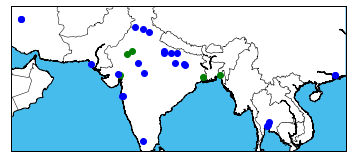

0.0
Godnjght

‡§ú‡§æ‡§®‡§ï‡§æ‡§∞‡•Ä ‡§ï‡•á ‡§≤‡§ø‡§è ‡§¶‡•á‡§ñ‡§ø‡§è ‡§∏‡§æ‡§ß‡§®‡§æ ‡§ö‡•à‡§®‡§≤ ‡§∂‡§æ‡§Æ 7:30 https://t.co/5B0nopghW7


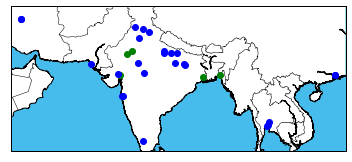

0.16666666666666666
Yogi ji sharm karo. Prabhu SriRam ke rajya main yesa dekhne ki baki rehgeyatha, wah kya yehi Modi ji ka beti bachao‚Ä¶ https://t.co/EHexLfMv7W


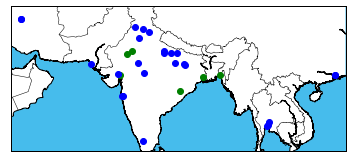

0.0
@Farzana4Music asi


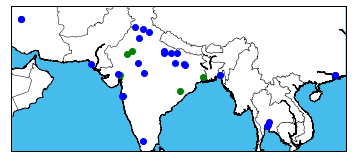

0.0
@nehaltyagi08 @VictoriousNamo Bangalore.   . weather , people , food


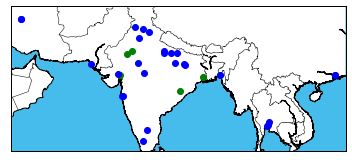

0.25
@gargrishant sir I am interested rdsp csp . please help


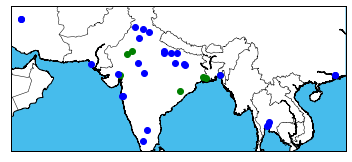

0.0
" ‡§Æ‡•à‡§Ç ‡§≤‡§ó‡§æ‡§§‡§æ‡§∞ ‡§â‡§® ‡§≤‡•ã‡§ó‡•ã‡§Ç ‡§ï‡•ã Follow Back ‡§ï‡§∞‡§§‡§æ ‡§ú‡§æ ‡§∞‡§π‡§æ ‡§π‡•Ç‡§Å ,
‡•§
‡§ú‡•ã ‡§Æ‡•á‡§∞‡•á ‡§ü‡•ç‡§µ‡§ø‡§ü ‡§ï‡•ã ‡§≤‡§æ‡§á‡§ï ‡§∞‡•Ä‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§ï‡§∞‡§§‡•á ‡§π‡•à‡§Ç
‡•§
‡§§‡§æ‡§ï‡§ø ‡§Æ‡•Å‡§ù‡•á ùêÄùêúùê≠ùê¢‚Ä¶ https://t.co/pxpfaxHOtN


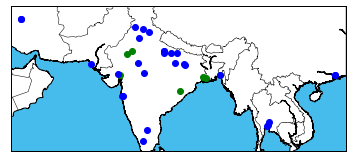

0.0
@johnsmithofiran @sabaazarpeik ÿ™ÿßÿ±€åÿÆ ÿØÿßÿ±Ÿá ÿ™⁄©ÿ±ÿßÿ± ŸÖ€åÿ¥Ÿá


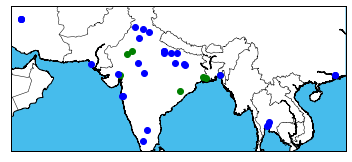

0.0
‡§ó‡•Å‡§∞‡•Å‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§π‡§∞‡§ø‡§Ø‡§æ‡§£‡§æ ‡§î‡§∞ ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§ï‡•á ‡§ï‡•Å‡§õ ‡§Ø‡•Å‡§µ‡§ï ‡§π‡§∞ ‡§ï‡•Ä ‡§™‡•å‡§°‡§º‡•Ä ‡§™‡§∞ ‡§∏‡•ç‡§®‡§æ‡§® ‡§ï‡§∞‡§§‡•á ‡§π‡•Å‡§è ‡§π‡•Å‡§ï‡•ç‡§ï‡§æ ‡§™‡•Ä ‡§∞‡§π‡•á ‡§•‡•á ‡§∂‡§∞‡•ç‡§Æ‡§®‡§æ‡§ï ‡§µ‡§æ‡§ï‡•ç‡§Ø,‡§¶‡•á‡§µ‡§≠‡•Ç‡§Æ‡§ø ‡§ï‡•ã ‡§ê‚Ä¶ https://t.co/Kp1rUtAzWH


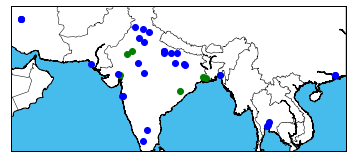

0.0
@YogeshSain9908 Congratulations üíê


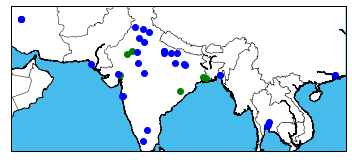

0.0
@LoveBharatvarsh @kavita_vasistha @KanchanGupta Languages used in the Tweet seems like ex student of Madarsa.


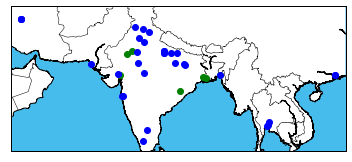

0.0
ÿ≤ŸÜÿØŸá ŸÖŸàŸÜÿØ€åŸÖ ÿß⁄ØŸá ŸÅÿ±ÿØÿß
ŸàÿπÿØŸá ŸÖÿß ŸÑÿ® ÿØÿ±€åÿß


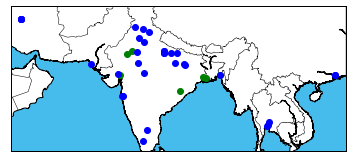

0.0
@raosahebdanve ‡§¶‡§∞ ‡§Æ‡§π‡§ø‡§®‡•ç‡§Ø‡§æ‡§®‡•Ä ‡§∂‡§ø‡§´‡•ç‡§ü ‡§Æ‡§ß‡•á ‡§¨‡§¶‡§≤ ‡§ï‡§∞‡§æ‡§µ‡§æ?


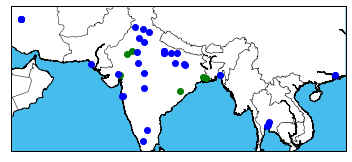

0.0
@nitingehlot29 üôèüôèüôè


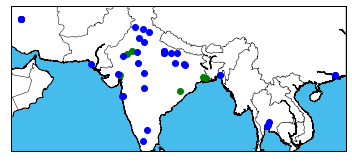

0.0
#‡§µ‡§ø‡§∂‡•ç‡§µ_‡§ï‡•Ä_‡§™‡§π‡§ö‡§æ‡§®_‡§π‡§ø‡§®‡•ç‡§¶‡•Ç
#‡§µ‡§ø‡§∂‡•ç‡§µ_‡§ï‡•Ä_‡§™‡§π‡§ö‡§æ‡§®_‡§π‡§ø‡§®‡•ç‡§¶‡•Ç
#‡§µ‡§ø‡§∂‡•ç‡§µ_‡§ï‡•Ä_‡§™‡§π‡§ö‡§æ‡§®_‡§π‡§ø‡§®‡•ç‡§¶‡•Ç 
#‡§µ‡§ø‡§∂‡•ç‡§µ_‡§ï‡•Ä_‡§™‡§π‡§ö‡§æ‡§®_‡§π‡§ø‡§®‡•ç‡§¶‡•Ç 
#‡§µ‡§ø‡§∂‡•ç‡§µ_‡§ï‡•Ä_‡§™‡§π‡§ö‡§æ‡§®_‡§π‡§ø‡§®‡•ç‡§¶‡•Ç


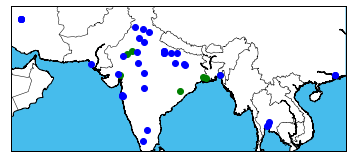

0.0
@indiaforums @sidharth_shukla


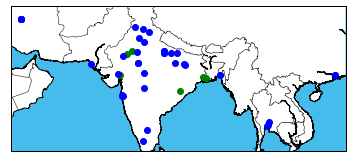

0.0
@OBCARMYCHIEF @Profdilipmandal https://t.co/6Ptv04XX4t


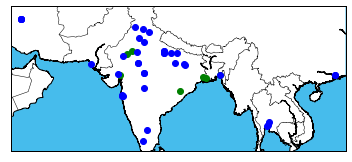

0.0
Or distracted


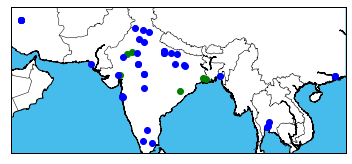

0.0
Allah please help us üò©üò©üò¢üò¢üòìüòì


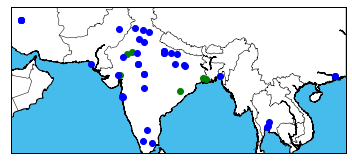

0.0
@Ramin_Ryan @mahfakajoneZz @_meshkii @masloobe_seda @miim_raa_shiin üòâ


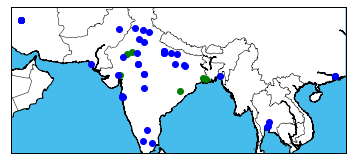

0.0
‡∞π‡±à‡∞§‡±Ä ‡∞Ö‡∞ß‡±ç‡∞Ø‡∞ï‡±ç‡∞∑‡±Å‡∞°‡±Å ‡∞∂‡±ç‡∞∞‡±Ä ‡∞ú‡±ã‡∞µ‡±Ü‡∞®‡±Ü‡∞≤‡±ç ‡∞Æ‡±ã‡∞Ø‡∞ø‡∞ú‡±ç ‡∞π‡∞§‡±ç‡∞Ø ‡∞™‡∞ü‡±ç‡∞≤ ‡∞∏‡∞Ç‡∞§‡∞æ‡∞™‡∞æ‡∞®‡±ç‡∞®‡∞ø ‡∞µ‡±ç‡∞Ø‡∞ï‡±ç‡∞§‡∞Ç ‡∞ö‡±á‡∞∏‡∞ø‡∞® ‡∞™‡±ç‡∞∞‚Äå‡∞ß‡∞æ‡∞® ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø
https://t.co/SZuRAwXmuq https://t.co/XliuvG4pFI


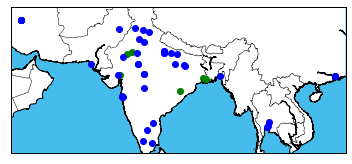

0.0
@Sanatan_Roots @ARVINDKRTIWARI ‡§ú‡§ø‡§§‡§®‡§æ ‡§≠‡§ú‡§æ‡§Æ‡§ø ‡§µ‡§æ‡§¶‡•Ä ‡§™‡§æ‡§∞‡•ç‡§ü‡•Ä ‡§Æ‡•á ‡§π‡•à‡§Ç ‡§â‡§®‡§∏‡•á ‡§Ö‡§ß‡§ø‡§ï


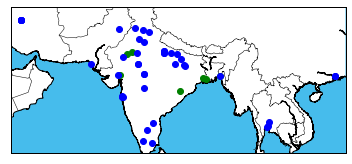

0.1875
My algorithm to find a unique one in a ten billion cellphone number.

https://t.co/FFJe5pQTHl

#Algorithm


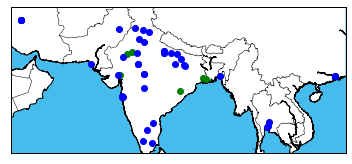

0.0
‡§â‡§ú‡•ç‡§ú‡•à‡§® ‡§ï‡•Ä ‡§®‡§à ‡§™‡§π‡§ö‡§æ‡§® ‡§î‡§¶‡•ç‡§Ø‡•ã‡§ó‡§ø‡§ï ‡§®‡§ó‡§∞‡•Ä...
‡§Æ‡•Å‡§ñ‡•ç‡§Ø‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§∂‡•ç‡§∞‡•Ä @ChouhanShivraj ‡§ú‡•Ä ‡§ï‡•á ‡§¶‡•ç‡§µ‡§æ‡§∞‡§æ 11 ‡§ú‡•Å‡§≤‡§æ‡§à ‡§ï‡•ã ‡§π‡•ã‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§≠‡•Ç‡§Æ‡§ø ‡§™‡•Ç‡§ú‡§®‚Ä¶ https://t.co/zg4iiajBrT


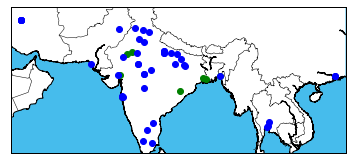

0.0
@arjunbhatigolf @SonuSood @ianuragthakur @ImRaina @SunielVShetty @ManMundra @imVkohli @dasraghubar @narendramodi‚Ä¶ https://t.co/AEvm0YVItQ


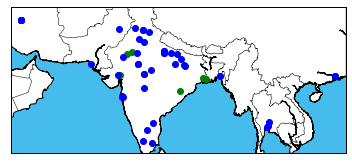

0.475
@RishiDarshan True and honest words by Sant Shri Asharamji Bapu
#AsharamjiBapuQuotes https://t.co/UMvz7Ux8l2


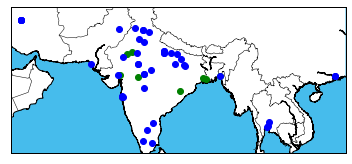

0.0
‡∏û‡∏µ‡πà‡∏¢‡∏≠‡∏á‡πÄ‡∏Ñ‡πÄ‡∏°‡∏ô‡πÅ‡∏î‡∏ô‡∏™‡πå


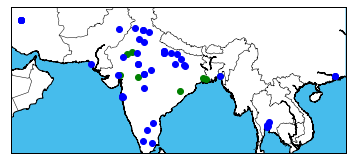

0.0
@Creampp39 ‡πÄ‡∏≠‡πá‡∏ô‡∏î‡∏π‡∏ß‡∏à‡∏£‡∏¥‡∏á‡πÜ‡∏Ñ‡πà‡∏∞ ‡∏™‡∏ô‡∏∏‡∏Å‡∏°‡∏≤‡∏Å‡πÉ‡∏™‡πà‡πÄ‡∏ï‡πá‡∏°‡πÄ‡πÄ‡∏£‡∏á


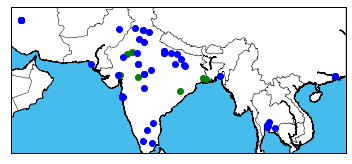

0.0
@S0xxsxx09 ÿ¥ŸÉÿ±ÿß ÿ™ÿ≥ŸÑŸÖŸä


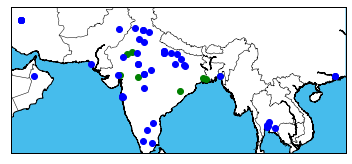

0.0
@FiazMahmood Ÿπ⁄æ€å⁄© €Å€í ÿ¨ŸÜÿßÿ®


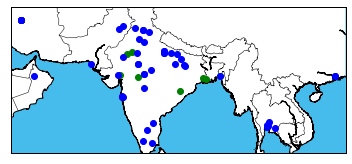

0.0
@alipoor_e ŸÖŸÖŸÜŸàŸÜŸÖ


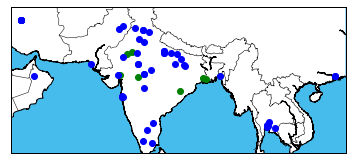

0.0
@StarSportsIndia Mohd. Shami


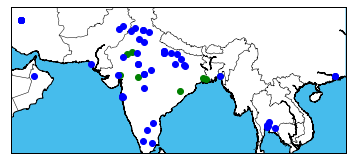

0.0
@Anzel_Nisha @gajendra6171


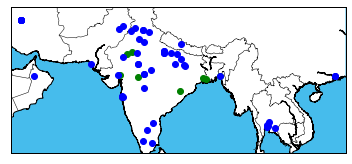

0.0
#‡§µ‡§ø‡§∂‡•ç‡§µ_‡§ï‡•Ä_‡§™‡§π‡§ö‡§æ‡§®_‡§π‡§ø‡§®‡•ç‡§¶‡•Ç


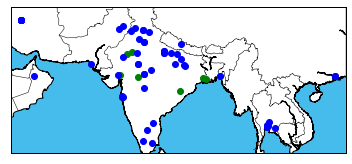

0.0
‡¥Æ‡µÇ‡¥®‡µç‡¥®‡µÅ ‡¥µ‡¥Ø‡¥∏‡µç‡¥∏‡µÅ‡¥Æ‡µÅ‡¥§‡¥≤‡µç‚Äç ‡¥™‡µÄ‡¥°‡¥ø‡¥™‡µç‡¥™‡¥ø‡¥ö‡µç‡¥ö‡µç ‡¥Ü‡¥±‡µç ‡¥µ‡¥Ø‡¥∏‡µç‡¥∏‡¥æ‡¥Ø‡¥™‡µç‡¥™‡µã‡¥≥‡µç‚Äç ‡¥ï‡µä‡¥®‡µç‡¥®‡µç ‡¥ï‡µÜ‡¥ü‡µç‡¥ü‡¥ø‡¥§‡µç‡¥§‡µÇ‡¥ï‡µç‡¥ï‡¥ø DYFI ‡¥®‡µá‡¥§‡¥æ‡¥µ‡µÅ‡¥Ç ‡¥Æ‡¥æ‡¥§‡µÉ‡¥ï‡¥Ø‡¥æ‡¥Ø‡¥ø...@AARahimdyfi https://t.co/QIBwBuCUBg


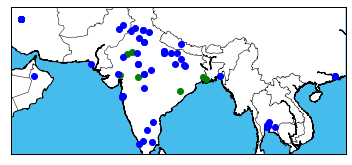

ProtocolError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
latlons=[]
#Twitter API Key
ckey = 'g5O5R3z2Cyq5XDlmN6dAxbkMD'
csecret ='WSzig9nw8uFPb3IhsFbGaHkJt9Kn4eF4Fue9Z9h11lL6XMkqE4'
atoken = '170628373-Xaxu6N7BkNkXBme8t1pCHxfmW1Aaz5oKmOtT8P7a'
asecret = 'alFUp5SkccHnFDcZhwdo23evLmEm9TyIXaytUT8MxG0Zr'
positive = u"latitude,longitude"
negative = u"latitude,longitude"
neutral = u"latitude,longitude"
keyword = input("Enter the hashtag for tweet to be searched:")
class listener(StreamListener):
    def on_data(self, data):
        la=[]
        lo=[]
        global  latlons 
        global positive
        global negative
        global neutral
        try: 
            js =(json.loads(data))
            tweet = (js['text'])
      
           
            blob = TextBlob(tweet)
            blob.sentiment.polarity 
            if True :
                positive = positive + "\n"
                negative = negative + "\n"
                neutral = neutral + "\n"
                la=[]
                lo=[]
                la.append(js['place']['bounding_box']['coordinates'][0][0][1])
                lo.append(js['place']['bounding_box']['coordinates'][0][0][0])
                la.append(js['place']['bounding_box']['coordinates'][0][1][1])
                lo.append(js['place']['bounding_box']['coordinates'][0][1][0])
                la.append(js['place']['bounding_box']['coordinates'][0][2][1])
                lo.append(js['place']['bounding_box']['coordinates'][0][2][0])
                la.append(js['place']['bounding_box']['coordinates'][0][3][1])
                lo.append(js['place']['bounding_box']['coordinates'][0][3][0])
                maxla=sum(la)
                maxlo=sum(lo)
                print(blob.sentiment.polarity)
                print(tweet)
                if blob.sentiment.polarity == 0:
                  neutral=neutral+ str(maxla/4)+","+str(maxlo/4)
                elif blob.sentiment.polarity > 0:
                  positive=positive+ str(maxla/4)+","+str(maxlo/4)
                else:
                  negative = negative + str(maxla/4)+","+str(maxlo/4)
                buildingdf = pd.read_csv(io.StringIO(positive), delimiter=",")
                buildingdfn = pd.read_csv(io.StringIO(negative), delimiter=",")
                buildingdfnt = pd.read_csv(io.StringIO(neutral), delimiter=",")
                latn = buildingdfn['latitude'].values
                lonn = buildingdfn['longitude'].values
                lat = buildingdf['latitude'].values
                lon = buildingdf['longitude'].values
                latnt = buildingdfnt['latitude'].values
                lonnt = buildingdfnt['longitude'].values
                # determine range to print based on min, max lat and lon of the data
                margin = 2 # buffer to add to the range
                lat_min = min(latnt) - margin
                lat_max = max(latnt) + margin
                lon_min = min(lonnt) - margin
                lon_max = max(lonnt) + margin
 
                # create map using BASEMAP
                m = Basemap(llcrnrlon=lon_min,
                            llcrnrlat=lat_min,
                            urcrnrlon=lon_max,
                            urcrnrlat=lat_max,
                            lat_0=(lat_max - lat_min)/2,
                            lon_0=(lon_max-lon_min)/2,
                            projection='merc',
                            resolution = 'h',
                            area_thresh=10000.,
                            )
                m.drawcoastlines()
                m.drawcountries()
                m.drawstates()
                m.drawmapboundary(fill_color='#46bcec')
                m.fillcontinents(color = 'white',lake_color='#46bcec')
                # convert lat and lon to map projection coordinates
                lons, lats = m(lon, lat)
                lonsn, latsn = m(lonn, latn)
                lonsnt, latsnt = m(lonnt, latnt)
                # plot points as red dots
                m.scatter(lons, lats, marker = 'o', color='g', zorder=5)
                m.scatter(lonsn, latsn, marker = 'o', color='r', zorder=5)
                m.scatter(lonsnt, latsnt, marker = 'o', color='b', zorder=5)
                plt.show()
                plt.pause(0.0001)
                plt.clf()
                
        except BaseException as e:
            print("Location Not Available")
            print('failed ondata.',str(e))
            time.sleep(5)
 
    def on_error(self, status):
        print(status)
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)
twitterStream = Stream(auth, listener())
twitterStream.filter(locations = [51.811523,4.258768,111.093750,31.428663])
twitterStream.filter(track=[keyword])